# Task
Analyze the distribution of `min_distance` and `distance` columns in the dataframe loaded from "/content/ways.csv" and plot the count of unique ways based on these distributions.

## Load the data

### Subtask:
Load the data from "/content/ways.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the head to verify the loading.



In [2]:
import pandas as pd

df = pd.read_csv("/content/ways.csv")
display(df.head())

,way_id,lat,lon,distance,min_distance
0,1,21.037674,105.860399,7521.7,NaN
1,2,21.039297,105.847156,6124.4,1388.192529
2,3,21.026721,105.836682,5934.9,1767.473267
3,4,21.018868,105.843100,4659.1,1095.975965
4,5,21.025180,105.854185,4345.5,1347.723097


## Analyze distributions

### Subtask:
Analyze the distribution of `min_distance` and `distance` columns using descriptive statistics and potentially visualizations.


**Reasoning**:
Calculate and display descriptive statistics for the `min_distance` and `distance` columns and then generate histograms for both columns to visualize their distributions.



,min_distance,distance
count,9874.000000,9875.000000
mean,305.633787,21649.338775
std,751.932025,16486.238577
min,0.000000,33.100000
25%,27.003429,8127.550000
50%,89.820268,14536.500000
75%,290.487980,35668.950000
max,20137.247755,74594.100000


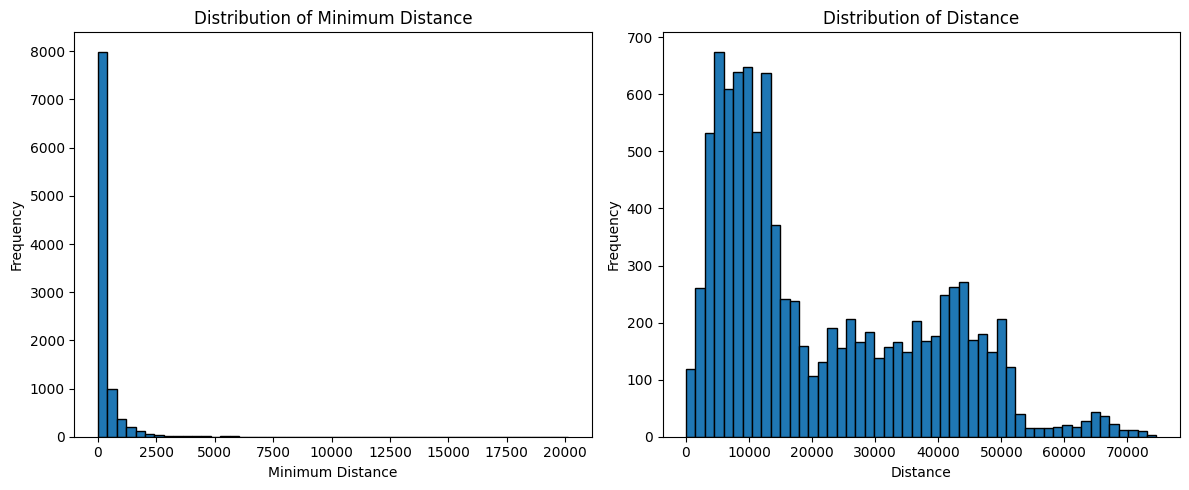

In [3]:
display(df[['min_distance', 'distance']].describe())

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['min_distance'].dropna(), bins=50, edgecolor='black')
axes[0].set_title('Distribution of Minimum Distance')
axes[0].set_xlabel('Minimum Distance')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['distance'], bins=50, edgecolor='black')
axes[1].set_title('Distribution of Distance')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Count unique ways

### Subtask:
Count the number of unique ways for different ranges or bins of `min_distance` and `distance`.


**Reasoning**:
Define bins for `min_distance` and `distance` using quantiles and equal-width bins respectively, create new categorical columns for these bins, and then group by these bins to count unique `way_id`s.



In [4]:
df['min_distance_bin'] = pd.qcut(df['min_distance'], q=10, labels=False, duplicates='drop')
df['distance_bin'] = pd.cut(df['distance'], bins=10, labels=False)

min_distance_counts = df.groupby('min_distance_bin')['way_id'].nunique()
distance_counts = df.groupby('distance_bin')['way_id'].nunique()

display(min_distance_counts)
display(distance_counts)

,way_id
min_distance_bin,
0.0,988
1.0,987
2.0,987
3.0,988
4.0,987
5.0,987
6.0,988
7.0,987
8.0,987


,way_id
distance_bin,
0,2196
1,2829
2,876
3,901
4,814
5,1127
6,825
7,104
8,145


## Visualize unique ways

### Subtask:
Create plots to visualize the count of unique ways based on the distributions of `min_distance` and `distance`.


**Reasoning**:
Create bar plots for `min_distance_counts` and `distance_counts` to visualize the unique way counts per bin, as requested by the subtask instructions.



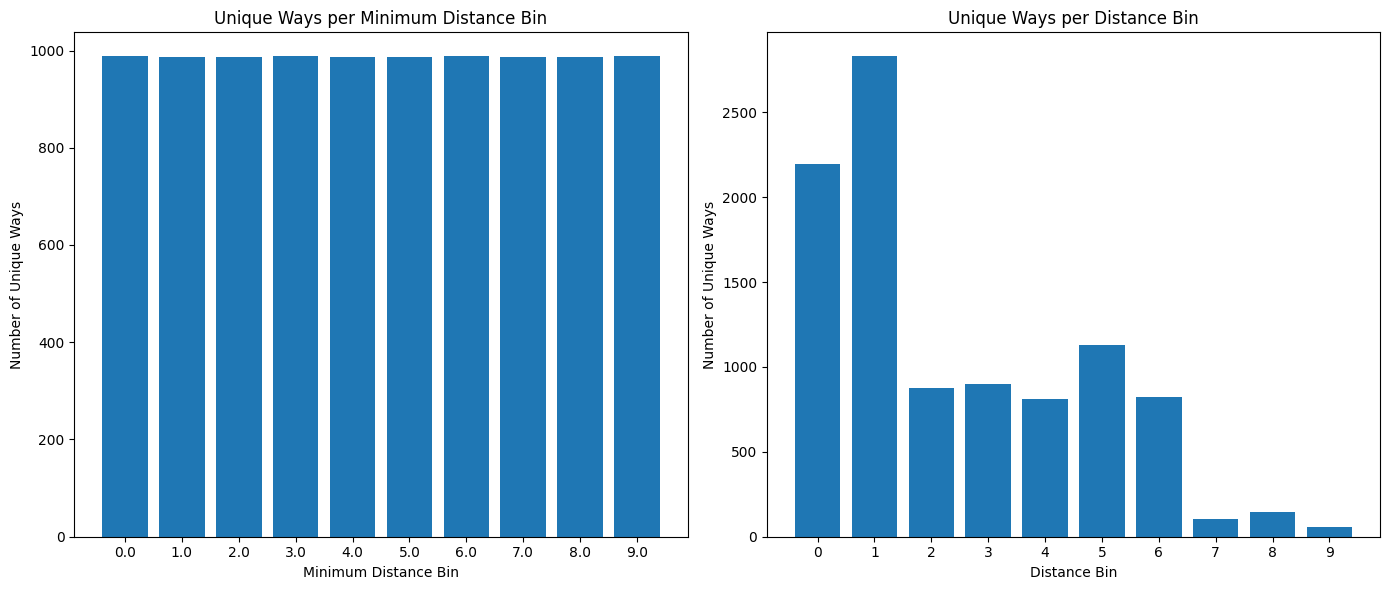

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(min_distance_counts.index.astype(str), min_distance_counts.values)
axes[0].set_title('Unique Ways per Minimum Distance Bin')
axes[0].set_xlabel('Minimum Distance Bin')
axes[0].set_ylabel('Number of Unique Ways')

axes[1].bar(distance_counts.index.astype(str), distance_counts.values)
axes[1].set_title('Unique Ways per Distance Bin')
axes[1].set_xlabel('Distance Bin')
axes[1].set_ylabel('Number of Unique Ways')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `min_distance` column was divided into 10 quantile bins, resulting in a relatively even distribution of unique way counts across these bins.
*   The `distance` column was divided into 10 equal-width bins, showing a highly uneven distribution of unique way counts. The majority of unique ways are concentrated in the lower distance bins.

### Insights or Next Steps

*   The uneven distribution of unique ways in the `distance` bins suggests that most ways are relatively short. Further investigation into the characteristics of ways in the higher distance bins could be insightful.
*   The quantile binning for `min_distance` provides a good way to analyze unique way counts across different percentiles of minimum distance.


# Task
Use pandas to load the data from "/content/ways.csv" and use open street map to plot all lat,lon inside ways.csv.

## Load the data

### Subtask:
Load the data from "/content/ways.csv" into a pandas DataFrame.


## Prepare data for mapping

### Subtask:
Select the `lat` and `lon` columns from the DataFrame.


**Reasoning**:
Select the 'lat' and 'lon' columns from the DataFrame `df`.



In [6]:
locations_df = df[['lat', 'lon']]
display(locations_df.head())

,lat,lon
0,21.037674,105.860399
1,21.039297,105.847156
2,21.026721,105.836682
3,21.018868,105.843100
4,21.025180,105.854185


## Visualize on a map

### Subtask:
Use a library like `folium` or `geopandas` to plot the latitude and longitude points on an OpenStreetMap.


**Reasoning**:
I will import the `folium` library, create a map centered on the mean latitude and longitude of the `locations_df`, and then add a marker for each location in the dataframe to the map.



In [7]:
import folium

# Create a map centered on the mean latitude and longitude
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)

# Add markers for each location
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['lon']]).add_to(m)

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.